# Chapter 4 - Linear Neural Networks for Classification

## 4.1. Softmax Regression

### 4.1.1. Classification

Suppose a simple image classification problem. Each input consists of a $2\times 2$ grayscale image, where each pixel value is represented with a single scalar: $x_1, x_2, x_3, x_4$. Also assume that each image belongs to one among the categories "cat", "chicken", and "dog".

A natural way to *store labels* is to use $y \in \{1, 2, 3\}$ to represent $\{\textrm{dog}, \textrm{cat}, \textrm{chicken}\}$. In general, a simple way to represent categorical data is the *one-hot encoding*. Therefore, $y \in \{1, 2, 3\}$ becomes
\begin{split}
y \in \{(1, 0, 0), (0, 1, 0), (0, 0, 1)\}
\end{split}

#### 4.1.1.1. Linear Model

In order to estimate the conditional probabilities associated with all the possible classes, we need a model with multiple outputs, one per class.

Since we have 4 features and 3 possible output categories, we need 12 scalars to represent the weights and 3 scalars to represent the biases:
\begin{split}
\begin{aligned}
o_1 &= x_1 w_{11} + x_2 w_{12} + x_3 w_{13} + x_4 w_{14} + b_1\\
o_2 &= x_1 w_{21} + x_2 w_{22} + x_3 w_{23} + x_4 w_{24} + b_2\\
o_3 &= x_1 w_{31} + x_2 w_{32} + x_3 w_{33} + x_4 w_{34} + b_3
\end{aligned}
\end{split}

The corresponding neural network diagram is shown below:

![](..\imgs\ch04\softmaxreg.svg)

The output layer is a *fully connected layer*. This can also be represented with vectors and matrices: $\mathbf{o} = \mathbf{W} \mathbf{x} + \mathbf{b}$, where $\mathbf{W}$ is a $3\times 4$ matrix and $\mathbf{b} \in \mathbb{R}^3$.

#### 4.1.1.2. The Softmax

The goals for outputs $o_i$,
* the outputs $o_i$ sum up to 1 in the way the probabilities behave
* the outputs $o_i$ are nonnegative

To achieve the goals, we can use an exponential function $P(y = i) \propto \exp o_i$. This satisfy the requirement that the conditional class probability increases with increasing $o_i$, it is monotonic, and all probabilities are nonnegative. They add up to 1 by dividing each by their sum, which is *normalization*.

The *softmax* function is putting the above two pieces together:
\begin{split}
\hat{\mathbf{y}} = \mathrm{softmax}(\mathbf{o}) \quad \textrm{where}\quad \hat{y}_i = \frac{\exp(o_i)}{\sum_j \exp(o_j)}
\end{split}

The **largest coordinate** of $\mathbf{o}$ corresponds to the most likely class according to $\hat{\mathbf{y}}$. Because the softmax operation preserves the ordering among its arguments,
\begin{split}
\operatorname*{argmax}_j \hat y_j = \operatorname*{argmax}_j o_j
\end{split}

#### 4.1.1.3. Vectorization

Assume given a minibatch $\mathbf{X} \in \mathbb{R}^{n \times d}$ of $n$ examples with dimensionality (number of inputs) $d$. Also assume that there are $q$ categories in the output. Then the weights satisfy $\mathbf{W} \in \mathbb{R}^{d \times q}$ and the bias satisfies $\mathbf{b} \in \mathbb{R}^{1\times q}$:
\begin{split}
\begin{aligned} 
\mathbf{O} &= \mathbf{X} \mathbf{W} + \mathbf{b}, \\ \hat{\mathbf{Y}} & = \mathrm{softmax}(\mathbf{O}) 
\end{aligned}
\end{split}
Since each row in $\mathbf{X}$ represents a data example, the softmax operation itself can be computed *rowwise*: for each row of $\mathbf{O}$, exponentiate all entries and then normalize them by the sum.

### 4.1.2. Loss Function

#### 4.1.2.1. Log-Likelihood

The output vectors $\hat{\mathbf{y}}$ of softmax function can be interpret as the (estimated) conditional probabilities of each class, given any input $\mathbf{x}$, such as $\hat{y}_1=P(y=\textrm{cat} \mid \mathbf{x})$.

Assume that for a dataset with features $\mathbf{X}$, the labels $\mathbf{Y}$ are represented with a one-hot encoding label vector. We can compare the estimates with reality by checking how probable the actual classes are according to our model, given the features:
\begin{split}
P(\mathbf{Y} \mid \mathbf{X}) = \prod_{i=1}^n P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)})
\end{split}
where the factorization is allowed here since we assume that each label is drawn independently from its respective distribution $P(\mathbf{y}\mid\mathbf{x}^{(i)})$.

Equivalently, this is the same as minimizing the negative log-likelihood:
\begin{split}
-\log P(\mathbf{Y} \mid \mathbf{X}) = \sum_{i=1}^n -\log P(\mathbf{y}^{(i)} \mid \mathbf{x}^{(i)})
= \sum_{i=1}^n l(\mathbf{y}^{(i)}, \hat{\mathbf{y}}^{(i)})
\end{split}
where for any pair of label $\mathbf{y}$ and model prediction $\hat{\mathbf{y}}$ over $q$ classes, the loss function $l$ is
\begin{split}
l(\mathbf{y}, \hat{\mathbf{y}}) = - \sum_{j=1}^q y_j \log \hat{y}_j
\end{split}

This loss function is called the *cross-entropy loss*. Since $\mathbf{y}$ is a one-hot vector of length $q$, the sum over all its coordinates $j$ vanishes for all but one term releated to the true category.

The loss $l(\mathbf{y}, \hat{\mathbf{y}})$ is bounded from below by 0 whenever $\hat{\mathbf{y}}$ is a probability vector.

#### 4.1.2.2. Softmax and Cross-Entropy Loss

If we substitute the softmax function into the cross-entropy loss function:
\begin{split}
\begin{aligned}
l(\mathbf{y}, \hat{\mathbf{y}}) &=  - \sum_{j=1}^q y_j \log \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} \\
&= \sum_{j=1}^q y_j \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j \\
&= \log \sum_{k=1}^q \exp(o_k) - \sum_{j=1}^q y_j o_j
\end{aligned}
\end{split}

Consider the derivative with respect to any logit $o_j$,
\begin{split}
\partial_{o_j} l(\mathbf{y}, \hat{\mathbf{y}}) = \frac{\exp(o_j)}{\sum_{k=1}^q \exp(o_k)} - y_j = \mathrm{softmax}(\mathbf{o})_j - y_j
\end{split}
In other words, the derivative is the difference between the probability assigned by our model, as expressed by the softmax operation, and what actually happened, as expressed by elements in the one-hot label vector.

This is similar to the regression: the gradient was the difference between the observation $y$ and estimate $\hat{y}$.

### 4.1.3. Information Theory Basics

#### 4.1.3.1. Entropy

For a distribution $P$, its *entropy*, $H[P]$, is defined as:
\begin{split}
H[P] = \sum_j - P(j) \log P(j)
\end{split}
which states that in order to encode data drawn randomly from the distribution $P$, we need at least $H[P]$ "nats" to encode it. One "nat" is $\frac{1}{\log(2)} \approx 1.44$ bit.

#### 4.1.3.2. Surprisal

Claude Shannon settled on $\log \frac{1}{P(j)} = -\log P(j)$ to quantify one's *surprisal* at observing an event $j$ having assigned it a (subjective) probability $P(j)$. The entropy is then the *expected surprisal* when one assigned the correct probabilities that truly match the data-generating process.

#### 4.1.3.3. Cross-Entropy Revisited

The cross-entropy *from P to Q*, $H(P, Q)$, is the expected surprisal of an observer with subjective probabilities $Q$ upon seeing data that was actually generated according to probabilities $P$.

This is given by $H(P, Q) \stackrel{\textrm{def}}{=} \sum_j - P(j) \log Q(j)$. The lowest possible cross-entropy is achieved when $P=Q$. In this case, the cross-entropy from $P$ to $Q$ is $H(P, P)= H(P)$.

## 4.2. The Image Classification Dataset

In [1]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms

from d2l import torch as d2l

# Use SVG format to display plot in jupyter
d2l.use_svg_display()

### 4.2.1. Loading the Dataset

Fashion-MNIST consists of images from 10 categories, each represented by 6000 images in the training dataset and by 1000 in the test dataset.

In [2]:
class FashionMNIST(d2l.DataModule):
    '''The Fashion-MNIST dataset'''
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([
            transforms.Resize(resize), # resize the image to resize
            transforms.ToTensor() # convert to tensor
        ])

        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, # root directory where dataset exists
            train=True, # training set
            transform=trans, # apply transform
            download=True # download if not exists
        )
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root,
            train=False, # validation set
            transform=trans,
            download=True
        )

In [3]:
# read data
data = FashionMNIST(batch_size=256, resize=(32, 32))
len(data.train), len(data.val)

100.0%


Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100.0%


Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



100.0%


Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100.0%

Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



(60000, 10000)

In [4]:
# the image is saved as a 3D tensor of shape (channel, height, width)
data.train[0][0].shape

torch.Size([1, 32, 32])

In [5]:
# Convert labels
@d2l.add_to_class(FashionMNIST)
def text_labels(self, indices):
    '''Return text labels'''
    labels = [
        't-shirt', 'trouser', 'pullover', 'dress', 'coat',
        'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot'
    ]
    return [labels[int(i)] for i in indices]

### 4.2.2. Reading a Minibatch

In [6]:
# use a built-in dataloader to read a minibatch of data with size batch_size
@d2l.add_to_class(FashionMNIST)
def get_dataloader(self, train):
    data = self.train if train else self.val
    
    dataloader = torch.utils.data.DataLoader(
        data, # dataset
        self.batch_size, # batch size
        shuffle=train, # shuffle if training
        num_workers=self.num_workers # number of subprocesses for data loading
    )
    return dataloader

In [7]:
# read a minibatch of data
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

torch.Size([256, 1, 32, 32]) torch.float32 torch.Size([256]) torch.int64


In [8]:
# check the time to read the entire dataset
tic = time.time()
for X, y in data.train_dataloader():
    continue
print(f'{time.time() - tic:.2f} sec')

5.50 sec


### 4.2.3. Visualization

In [9]:
# There is a function show_images in d2l to display images
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    '''Plot a list of images'''
    return NotImplemented

In [10]:
# we can use the function to display the first few images
@d2l.add_to_class(FashionMNIST)
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)

    # display images
    d2l.show_images(
        X.squeeze(1), # remove channel dimension
        nrows, ncols, # number of rows and columns
        titles=labels # labels
    )

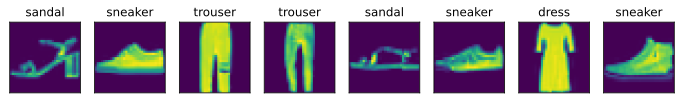

In [11]:
batch = next(iter(data.train_dataloader()))
data.visualize(batch)

## 4.3. The Base Classification Model

In [12]:
import torch
from d2l import torch as d2l

### 4.3.1. The `Classifier` Class

In [13]:
class Classifier(d2l.Module):
    '''The base class of classification models'''
    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

We draw an update for every `num_val_batches` batches in the `validation_step`.

Also, initialize the optimizer in the `d2l.Module`:

In [14]:
@d2l.add_to_class(d2l.Module)
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), lr=self.lr)

### 4.3.2. Accuracy

In [15]:
@d2l.add_to_class(Classifier)
def accuracy(self, Y_hat, Y, averaged=True):
    '''Compute the number of correct predictions'''
    # Y_hat is a 2D tensor of shape (batch_size, num_classes)
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    # Y is a 1D tensor of shape (batch_size)
    preds = Y_hat.argmax(axis=1).type(Y.dtype)
    # compare preds and Y element-wise
    compare = (preds == Y.reshape(-1)).type(torch.float32)

    return compare.mean() if averaged else compare

If `Y_hat` is a matrix, the second dimension stores prediction scores for each class. The `argmax` is used to obtain the predicted class by the index for the largest entry in each row. Then we compare the predicted class with the ground truth `Y` element-wise.

## 4.4. Softmax Regression Implementation from Scratch

In [16]:
import torch
from d2l import torch as d2l

### 4.4.1. The Softmax

Given a matrix `X`, we can sum over all elements (by default) or only over elements in the same axis:

In [17]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])

In [21]:
X.sum(axis=0, keepdims=True)

tensor([[5., 7., 9.]])

In [20]:
X.sum(axis=1, keepdims=True)

tensor([[ 6.],
        [15.]])

Recall the softmax:
\begin{split}
\mathrm{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}
\end{split}

The (logarithm of the) denominator is the (log) *partition function*.

In [22]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(axis=1, keepdims=True)
    # The broadcasting mechanism is applied here
    res = X_exp / partition
    return res

In [23]:
# test softmax function
X = torch.rand((2, 5))
X_prob = softmax(X)

X_prob, X_prob.sum(axis=1)

(tensor([[0.1446, 0.3130, 0.1553, 0.1402, 0.2469],
         [0.2197, 0.1749, 0.1749, 0.2206, 0.2099]]),
 tensor([1., 1.]))

### 4.4.2. The Model

In [24]:
class SoftmaxRegressionScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()

        # initialize weights and bias
        self.W = torch.normal(0, # mean
                              sigma, # std
                              size=(num_inputs, num_outputs), # shape
                              requires_grad=True, # requires gradient
                              )
        self.b = torch.zeros(num_outputs, # shape
                             requires_grad=True # requires gradient
                             )
        
    def parameters(self):
        return [self.W, self.b]

Ask the network to map each input to an output:

In [25]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, # batch size
                   self.W.shape[0], # number of inputs
                   ))
    res = softmax(torch.matmul(X, self.W) + self.b)
    return res

### 4.4.3. The Cross-Entropy Loss

Recall that cross-entropy takes the negative log-likelihood of the predicted probability assigned to the true label.

In [31]:
# true labels
y = torch.tensor([0, 2])
# predictions
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat

tensor([[0.1000, 0.3000, 0.6000],
        [0.3000, 0.2000, 0.5000]])

We can use `y` as the indices of the probabilities in `y_hat`:

In [28]:
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

Implement the cross-entropy loss function:

In [32]:
def cross_entropy(y_hat, y):
    res = -torch.log(y_hat[list(range(len(y_hat))), y]).mean()
    return res

In [33]:
cross_entropy(y_hat, y)

tensor(1.4979)

Now add the cross-entropy to the `SoftmaxRegressionScratch` class

In [34]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

### 4.4.4. Training

We reuse the `fit` method defined in the `d2l.Trainer` class to train the model.

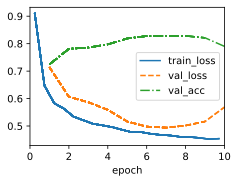

In [35]:
# load data
batch_size = 256
size = 32
data = d2l.FashionMNIST(batch_size=batch_size, 
                        resize=(size, size))

# create model
model = SoftmaxRegressionScratch(num_inputs=size*size,
                                 num_outputs=10,
                                 lr=0.1)

# create trainer
max_epochs = 10
trainer = d2l.Trainer(max_epochs=max_epochs)

# train model
trainer.fit(model, data)

### 4.4.5. Prediction

In [36]:
# evaluate model on validation set
X, y = next(iter(data.val_dataloader()))

# make predictions
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256])

We are more interested in the images that are incorrectly classified:

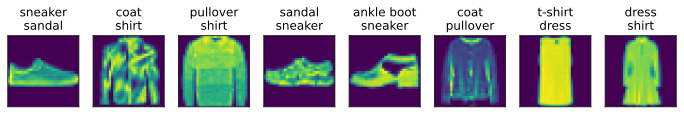

In [37]:
wrong = preds.type(y.dtype) != y
# select wrong predictions
X, y, preds = X[wrong], y[wrong], preds[wrong]

# get text labels
labels = [a + '\n' + b for a, b in zip(data.text_labels(y), data.text_labels(preds))]

# display wrong predictions
data.visualize([X, y], labels=labels)

## 4.5. Concise Implementation of Softmax Regression

In [1]:
import torch
from torch import nn
from torch.nn import functional as F

from d2l import torch as d2l

### 4.5.1. Defining the Model

Use the built-in fully connected layer. The built-in `__call__` method invokes `forward` method.

We also need a `Flatten` layer to convert the 4th-order tensor `X` to 2nd order by keeping the dimensionality along the 1st axis unchanged.

In [2]:
class SoftmaxRegression(d2l.Classifier):
    '''The softmax regression model'''
    def __init__(self, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()

        self.net = nn.Sequential(
            nn.Flatten(), # flatten the input
            nn.LazyLinear(num_outputs) # linear layer
        )

    def forward(self, X):
        return self.net(X)

### 4.5.2. Softmax Revisited

When the softmax function computes probabilities via $\hat y_j = \frac{\exp(o_j)}{\sum_k \exp(o_k)}$, if some of the $o_k$ are very large, i.e., very positive, then $\exp(o_k)$ might be larger than the largest number for certain data types. This is called *overflow*. If it is a very large negative number, it is *underflow*.

One way to avoid this issue is to subtract $\bar{o} \stackrel{\textrm{def}}{=} \max_k o_k$ from all entries:
\begin{split}
\hat y_j = \frac{\exp o_j}{\sum_k \exp o_k} =
\frac{\exp(o_j - \bar{o}) \exp \bar{o}}{\sum_k \exp (o_k - \bar{o}) \exp \bar{o}} =
\frac{\exp(o_j - \bar{o})}{\sum_k \exp (o_k - \bar{o})}
\end{split}
so $o_j - \bar{o} \leq 0$ for all $j$.

For a $q$-class classification problem, the denominator is contained in the interval $[1, q]$. The numerator never exceeds 1 to prevent numerical overflow. Numerical underflow only occurs when $\exp(o_j - \bar{o})$ numerically evaluates as 0. Nonetheless, we need to face the issue where $\log \hat{y}_j = \log 0$ so we had the `NaN` (Not a Number) results.

By combining softmax and cross-entropy, we can escape the numerical stability issues altogether:
\begin{split}
\log \hat{y}_j =
\log \frac{\exp(o_j - \bar{o})}{\sum_k \exp (o_k - \bar{o})} =
o_j - \bar{o} - \log \sum_k \exp (o_k - \bar{o})
\end{split}
which avoids both overflow and underflow.

Instead of passing softmax probabilities into this new loss function, we just pass the logits and compute the softmax and its log all at once inside the cross-entropy loss function.

In [5]:
@d2l.add_to_class(d2l.Classifier)
def loss(self, Y_hat, Y, averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    Y = Y.reshape((-1,))
    loss = F.cross_entropy(Y_hat, Y,
                           reduction='mean' if averaged else 'none')
    
    return loss

### 4.5.3. Training

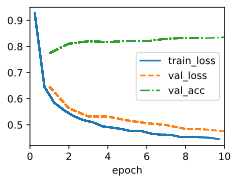

In [6]:
# load data
batch_size = 256
data = d2l.FashionMNIST(batch_size=batch_size)

# create model
model = SoftmaxRegression(num_outputs=10, lr=0.1)

# create trainer
trainer = d2l.Trainer(max_epochs=10)

# train model
trainer.fit(model, data)

## 4.6. Generalization in Classification

For many models, and for any desired upper bound on the generalization gap $\epsilon$, we can often determine some required number of samples $n$ such that if our training set contains at least $n$ samples, our empirical error will lie within $\epsilon$ of the true error, *for any data generating distribution.*

### 4.6.1. The Test Set

Suppose a fixed classifier $f$ and a *fresh* dataset of examples $\mathcal{D} = {(\mathbf{x}^{(i)},y^{(i)})}_{i=1}^n$ that were not used to train the classifier $f$. The *empirical error* of this classifier $f$ on $\mathcal{D}$ is the fraction of instances for which the prediction $f(\mathbf{x}^{(i)})$ disagrees with the true label $y^{(i)}$:
\begin{split}
\epsilon_\mathcal{D}(f) = \frac{1}{n}\sum_{i=1}^n \mathbf{1}(f(\mathbf{x}^{(i)}) \neq y^{(i)})
\end{split}

By contrast, the *population error* is the *expected* fraction of examples in the underlying population (some distribution) $P(X,Y)$ characterized by probability density function $p(\mathbf{x},y)$ for which the classifier disagrees with the true label:
\begin{split}
\epsilon(f) =  E_{(\mathbf{x}, y) \sim P} \mathbf{1}(f(\mathbf{x}) \neq y) =
\int\int \mathbf{1}(f(\mathbf{x}) \neq y) p(\mathbf{x}, y) \;d\mathbf{x} dy
\end{split}

While $\epsilon(f)$ is the quantity we actually care about, it cannot be observed directly since we cannot measure every single sample in a large population. Because the test set $\mathcal{D}$ is statistically representative of the underlying population, we can view $\epsilon_\mathcal{D}(f)$ as a statistical estimator of the population error $\epsilon(f)$.

The *central limit theorem* guarantees that whenever we possess $n$ random samples $a_1,...,a_n$ drawn from any distribution with mean $\mu$ and standard deviation $\sigma$, then, as the number of samples $n$ approaches infinity, the sample average $\hat{\mu}$ approximately tends towards a normal distribution centered at the true mean and with standard deviation $\sigma/\sqrt{n}$.

Therefore, as the number of examples grows large, the test error $\epsilon_\mathcal{D}(f)$ should approach the true error $\epsilon(f)$ at a rate of $\mathcal{O}(1/\sqrt{n})$. This means that **we must collect 10,000 times as large as a test set in order to reduce the test error by a factor of 100**.

The random variable of interest $\mathbf{1}(f(X) \neq Y)$ can only take values 0 and 1 as a Bernoulli random variable, characterized by a parameter indicating the probability that it takes value 1. 1 means that the classifier madean error, so the parameter of the random variable is actually the true error rate $\epsilon(f)$. The variance $\sigma^2$ of a Bernoulli depends on its parameter(here, $\epsilon(f)$) according to $\epsilon(f)(1-\epsilon(f))$. The variance is the highest when the true error rate is close to 0.5 and can be far lower when it is close to 0 or close to 1. Hence, the asymptotic standard deviation of our estimate $\epsilon_\mathcal{D}(f)$ of the error $\epsilon(f)$ cannot be any greater than $\sqrt{0.25/n}$.

If we want our test error $\epsilon_\mathcal{D}(f)$ to approximate the population error $\epsilon(f)$ such that one standard deviation corresponds to an interval of $\pm 0.01$, then we should collect roughly 2500 samples. If we want to fit two standard deviations in that range and thus be 95% confident that $\epsilon_\mathcal{D}(f)\in\epsilon(f)\pm 0.01$, then we need 10,000 samples!

This turns out to be the size of the test sets for many popular benchmarks in machine learning.

Since the random variable is bounded, we can obtain valid finite sample bounds:
\begin{split}
P(\epsilon_\mathcal{D}(f) - \epsilon(f) \geq t) < \exp\left( - 2n t^2 \right)
\end{split}

The smallest dataset size, which would allow us to conclude with 95% confidence that the distance $t$ between our estimate $\epsilon_\mathcal{D}(f)$ and the true error rate $\epsilon(f)$ does not exceed 0.01, is roughly 15,000 examples, as compared to the 10,000 examples suggested by our asymptotic analysis above.

### 4.6.2. Test Set Reuse

When running a series of benchmark challenges, it is often good practice to maintain several test sets so that after each round, the old test set can be demoted to a validation set.

## 4.7. Environment and Distribution Shift

### 4.7.1. Types of Distribution Shift

Assume that the training data was sampled from $p_S(\mathbf{x},y)$ but the test data will consist of unlabeled examples drawn from some different distribution $p_T(\mathbf{x},y)$.

Consider a binary classification problem (dogs/cats). If the distributions over inputs remain constant: $p_S(\mathbf{x}) = p_T(\mathbf{x})$ but the labels are all flipped: $p_S(y \mid \mathbf{x}) = 1 - p_T(y \mid \mathbf{x})$. In other words, all "cats" are now dogs and all "dogs" are now cats. Then we cannot possibly distinguish this setting from one in which the distribution did not change at all.

#### 4.7.1.1 Covariate Shift

Assume that while the distribution of inputs may change over time, the labeling function, i.e., the conditional distribution $P(y \mid \mathbf{x})$ does not change. This is called the *covariate shift* because the problem arises due to a shift in the distribution of the covariates (features).

An example for this would be that a classifier was trained with photos of dogs and cats, while it has been tested on the cartoon pictures of dogs and cats.

#### 4.7.1.2. Label Shift

Assume that the label marginal $P(y)$ can change but the class-conditional distribution $P(\mathbf{x}\mid y)$ remains fixed across domains.

#### 4.7.1.3. Concept Shift

The *concept shift* arises when the very definitions of labels can change. For example, the distribution $P(y \mid \mathbf{x})$ might be different depending on our location or over time.

### 4.7.3. Correction of Distribution Shift

#### 4.7.3.1. Empirical Risk and Risk

During model training, we iterate over features and associated labels of training data $\{(\mathbf{x}_1, y_1), \ldots, (\mathbf{x}_n, y_n)\}$ and update the parameters of a model $f$ after every minibatch. Regardless of regularization, we want to minimize the loss on the training:
\begin{split}
\mathop{\mathrm{minimize}}_f \frac{1}{n} \sum_{i=1}^n l(f(\mathbf{x}_i), y_i)
\end{split}
where $l$ is the loss function measuring "how bad" the prediction $f(\mathbf{x}_i)$ is given the associated label $y_i$, and it is called the *empirical risk*.

The *empirical risk* is an average loss over the training data for approximating the *risk*, which is the expectation of the loss over the entire population of data drawn from their true distribution $p(\mathbf{x},y)$:
\begin{split}
E_{p(\mathbf{x}, y)} [l(f(\mathbf{x}), y)] = \int\int l(f(\mathbf{x}), y) p(\mathbf{x}, y) \;d\mathbf{x}dy
\end{split}

Since we cannot obtain the entire population of data, the *empirical risk minimization* is a practical strategy for machine learning with the hope of approximately minimizing the risk.

#### 4.7.3.2. Covariate Shift Correction